## Lab 4

By: Maryanne Thangarajah

Link to Github repository: https://github.com/mthangarajah/Labs.git

In [40]:
#Load packages needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To remove warnings 
import warnings
warnings.filterwarnings('ignore')

### Question 1:

Read in the file 'listings' that contains the listings for the Boston AirBnBs. How many entries are in the file? How many unique identifiers are there for AirBnB listings? 

Hint: https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.nunique.html

In [41]:
#Load the listing data
listing = pd.read_csv('listings.csv')

#Number of entries
q1 = listing.shape[0]

#Print statement for the number of entries in the listing file
print("There are {0} entries in the listing file.".format(q1))

There are 6264 entries in the listing file.


In [42]:
#Number of unique identifiers
q1_unique = listing["id"].nunique()

#Print statement for the unique number of entries in the listing file
print("There are {0} unique entries in the listing file.".format(q1_unique))

There are 6264 unique entries in the listing file.


### Question 2: 

Read in the 'reviews' file that contains the date of reviews for the Boston AirBnB listings. How many entries are in the file? How many unique identifiers are there for AirBnB listings? Do all of the listings have a corresponding review?

In [43]:
#Load the reviews file
reviews = pd.read_csv('reviews.csv')

#Number of entries
q2 = reviews.shape[0]

#Print statement for the number of entries in review file
print("There are {0} entries in the review file.".format(q2))

There are 225880 entries in the review file.


In [44]:
#Number of unique entries in review file
q2_unique = reviews["listing_id"].nunique()

#Print statement for the number of unique entries in the review file
print("There are {0} unique entries in the review file.".format(q2_unique))

There are 5088 unique entries in the review file.


All the listings do not have a corresponding review. There are 6264 listings compared to 5088 unique entries in the review file. Therefore, there are 1176 listings without a review.

### Question 3

Merge the review and listing files. Do a merge using the function 'pd.merge' so that all of the entries from listing are in the merged data frame and have an NaN if there is no corresponding entry in reviews. How many rows do you now have? How many unique AirBnB ids do you have? How many rows were filled in with NaN?

In [45]:
# Merge the review and listing file on the ID using outer merge
question3_merge = pd.merge(reviews, listing, left_on = "listing_id", 
                           right_on = "id", how = "outer")

#Number of entries using shape
q3_entries = question3_merge.shape[0]

#Print Statement for number of entries in the merged file
print("The number of entries in the merged file is {0}.".format(q3_entries))

The number of entries in the merged file is 227056.


In [46]:
#Number of unique entries
q3_unique = question3_merge["id"].nunique()

#Print statement for unique number of entries in the merged files
print("The number of unique entries in the merged file is {0}.".format(q3_unique))

The number of unique entries in the merged file is 6264.


In [47]:
#Number of NaN in the merged file
q3_na = question3_merge["listing_id"].isna().sum()

#Print statement for the number of NaN in the merged file
print("The number of entries filled with NaN in the merged file is {0}.".format(q3_na))

The number of entries filled with NaN in the merged file is 1176.


### Question 4:

Merge the review and listing files again using 'pd.merge'. This time do a merge so that all of the entries from reviews are in the dataframe (and therefore any entries from listings that do not have a review are dropped). How many rows do you now have? How many unique AirBnB ids do you have?

In [48]:
# Merge the review and listing file using left merge
question4_merge = pd.merge(reviews, listing, left_on = "listing_id", 
                           right_on = "id", how = "left")

#Number of entries using shape
q4_count = question4_merge.shape[0]

#Print statement for number of entries in merged file
print("The number of entries in the merged file using left merge is {0}.".format(q4_count))

The number of entries in the merged file using left merge is 225880.


In [49]:
# Number of unique AirBnB ids in the left merged file 
q4_unique = question4_merge["listing_id"].nunique()

#Print statement for the unique AirBnB ids in the merged file
print("The number of unique AirBnB ids in the merged file using left merge is {0}.".format(q4_unique))

The number of unique AirBnB ids in the merged file using left merge is 5088.


### Question 5
Accoring to AirBnB superhosts 'are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests'. How many unique AirBnBs are hosted by a 'superhost' in Boston? How many superhosts are there in Boston? How many super hosts do not have any reviews in the 'reviews' dataset? What is the median number of reviews that a superhost has in the 'reviews' dataset?

In [50]:
#Number of Unique AirBnBs by dropping duplicates
super_host = listing.drop_duplicates(subset ="id")

#Find all superhosts from unique AirBnBs above
is_super_host = super_host[super_host["host_is_superhost"]== "t"] 

#Number of superhosts in Boston through count
q5count = is_super_host["host_is_superhost"].count()

#Print statement for number of superhosts in Boston
print("There are {0} unique AirBnBs that are hosted by a superhost in Boston.".format(q5count))

There are 1448 unique AirBnBs that are hosted by a superhost in Boston.


In [51]:
#Number of Unique hosts in Boston by dropping duplicates
super_host_unique = listing.drop_duplicates(subset ="host_id")

#Find all superhosts from unique ids above 
is_super_host_unique = super_host_unique[super_host_unique
                                         ["host_is_superhost"]== "t"] 

#Number of unqiue superhosts in Boston through count
q5_unique = is_super_host_unique["host_is_superhost"].count()

#Print statement for number of unqiue superhosts in Boston
print("There are {0} superhosts in Boston.".format(q5_unique))

There are 757 superhosts in Boston.


In [52]:
#Number of Superhosts using merged dataframe from question 3
superhost = question3_merge[question3_merge
                                         ["host_is_superhost"]== "t"]

#Number of superhosts without a review using isna() and sum()
without_reviews = superhost["listing_id"].isna().sum()

#Print statement for number of superhosts without a review
print("There are {0} superhosts without a review.".format(without_reviews))

There are 70 superhosts without a review.


In [53]:
#Median number of reviews for superhosts by grouping by host id through listing id
#Then,count the number of reviews after grouping and find the median
superhost_median = superhost.groupby("host_id")["listing_id"].agg('count').median()

#Print statement for the median number of reviews for superhosts
print("The median number of reviews for a superhost is {0}".format(superhost_median))

The median number of reviews for a superhost is 72.0


### Question 6:
Make boxplots to compare the number of reviews of superhosts to non-superhosts. Hint: the boxplots may look better if you log the counts! Add 1 to the number of counts so that you can log values of 0.

In [54]:
#Create a new dataframe using 3 columns from the merged file from question 3
number_reviews = question3_merge[["host_id","listing_id","host_is_superhost"]]

#Create a new column count by grouping by the host id and count the number of listing id for each host id
number_reviews["count"] =  number_reviews.groupby(["host_id"])["listing_id"].transform("count")

# Drop the duplicate copies of the host id in the dataframe
number_reviews = number_reviews.drop_duplicates("host_id")

# Create a new column count1 to add 1 to each value in using the count column
number_reviews["count1"] = number_reviews["count"] + 1

# Create a new column log_count to get the log count from the count1 column
number_reviews["log_count"] = np.log(number_reviews["count1"]) 

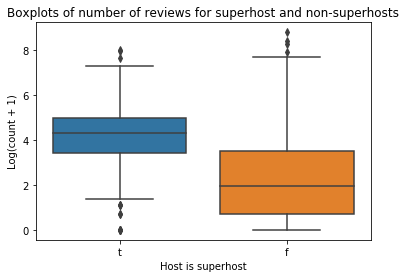

In [55]:
#Create a boxplot using the data from number_reviews, 
# where x is host_is_superhost and y is log count
sns.boxplot(y='log_count',x = "host_is_superhost", 
                 data=number_reviews)

#The x-axis label
plt.xlabel("Host is superhost")

#The y-axis label
plt.ylabel("Log(count + 1)")

#The title of the plot
plt.title("Boxplots of number of reviews for superhost and non-superhosts")

#Show the plot
plt.show()